In [105]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Importing the Dataset

In [106]:
data_perform = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Data analytics files\Student_Performance.csv")
data_perform.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [107]:
data_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [108]:
data_perform.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [109]:
data_perform.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [110]:
data_perform.duplicated().sum()

127

In [111]:
data_perform.drop_duplicates()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Visualizing the Data

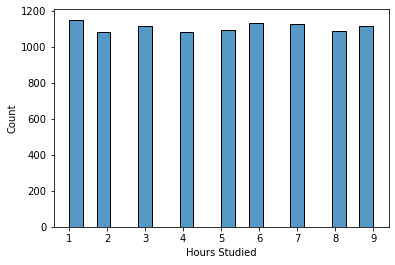

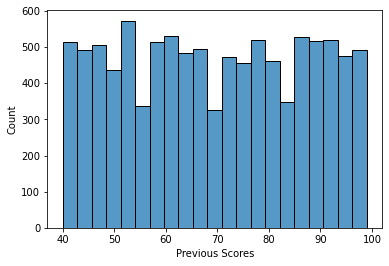

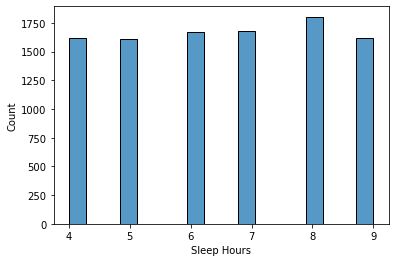

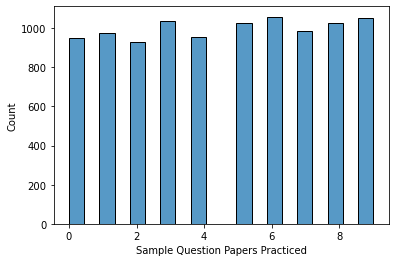

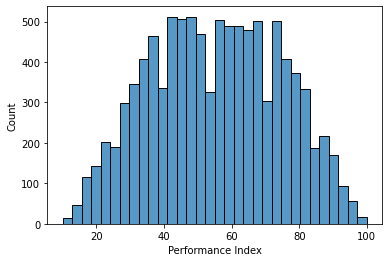

In [112]:
a = "Extracurricular Activities"

for no , i in enumerate(data_perform.columns):
    if i != a :
        sns.histplot(data=data_perform,x=i)
        plt.show()

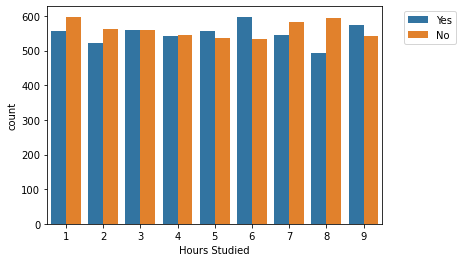

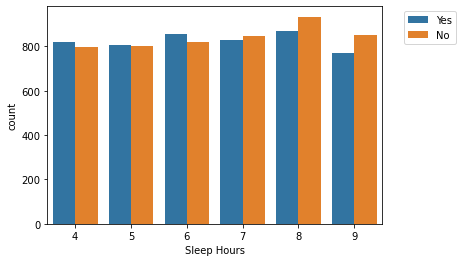

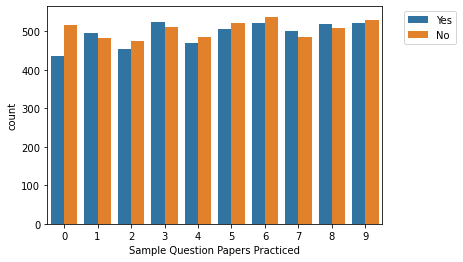

In [113]:
for i in ['Hours Studied', 'Sleep Hours','Sample Question Papers Practiced']:
    sns.countplot(x=i,hue="Extracurricular Activities",data=data_perform)
    plt.legend(bbox_to_anchor = (1.05,1))
    plt.show()

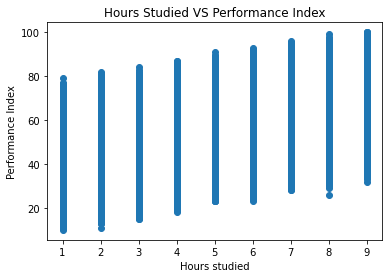

In [114]:
plt.scatter(data_perform["Hours Studied"],data_perform["Performance Index"])


plt.xlabel("Hours studied")
plt.ylabel("Performance Index")
plt.title("Hours Studied VS Performance Index")
plt.show()

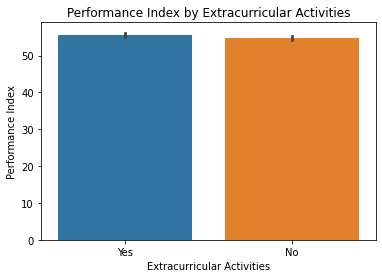

In [115]:
sns.barplot(x="Extracurricular Activities", y="Performance Index",data=data_perform)

plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.title("Performance Index by Extracurricular Activities")
plt.show()

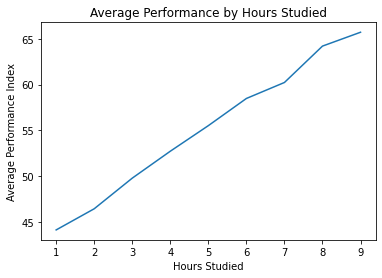

In [116]:
avg_performance_by_hours = data_perform.groupby("Hours Studied")["Performance Index"].mean()
plt.plot(avg_performance_by_hours.index,avg_performance_by_hours.values)
plt.xlabel("Hours Studied")
plt.ylabel("Average Performance Index")
plt.title("Average Performance by Hours Studied")
plt.show()

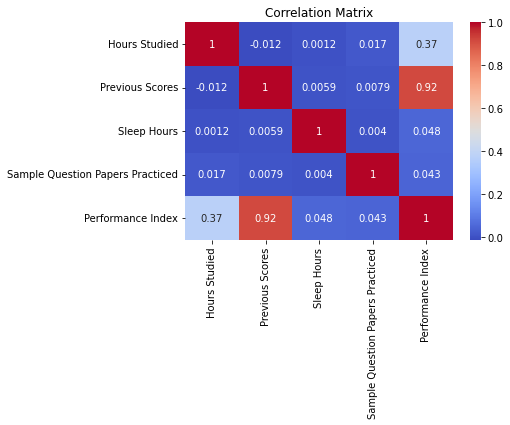

In [117]:
# Heatmap: Correlation Matrix
correlation_matrix = data_perform[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

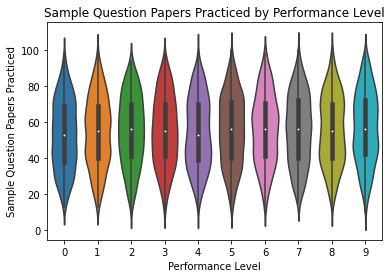

In [118]:
sns.violinplot(y="Performance Index",x="Sample Question Papers Practiced",data=data_perform)
plt.xlabel("Performance Level")
plt.ylabel("Sample Question Papers Practiced")
plt.title('Sample Question Papers Practiced by Performance Level')
plt.show()

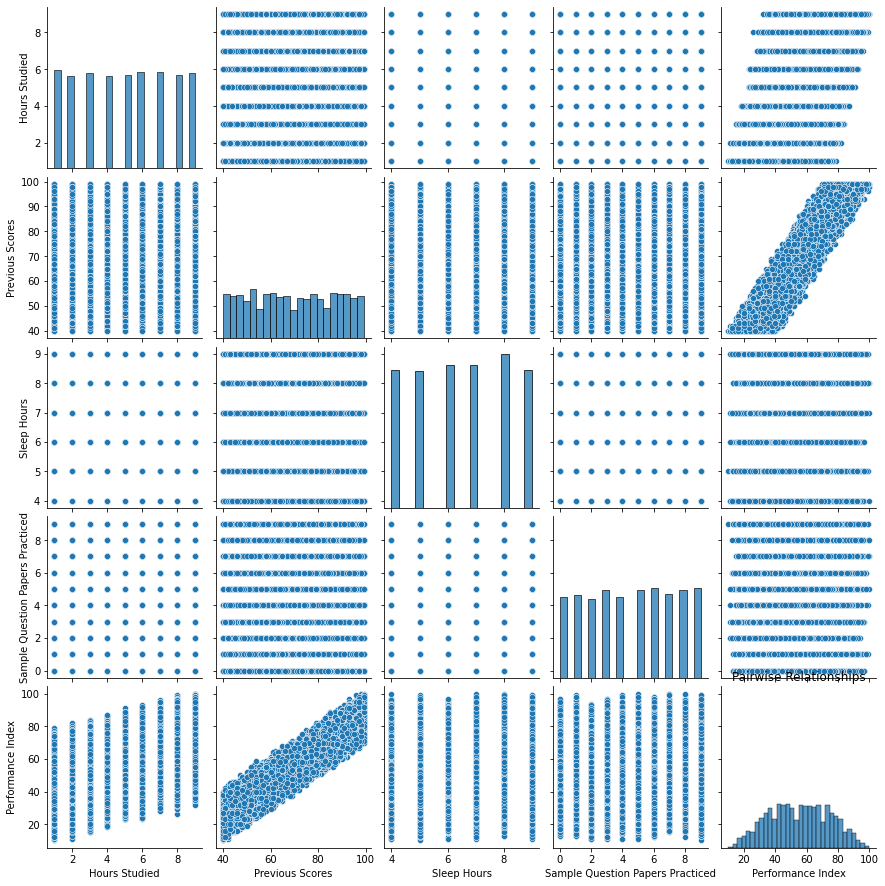

In [119]:
sns.pairplot(data_perform[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.title("Pairwise Relationships")
plt.show()

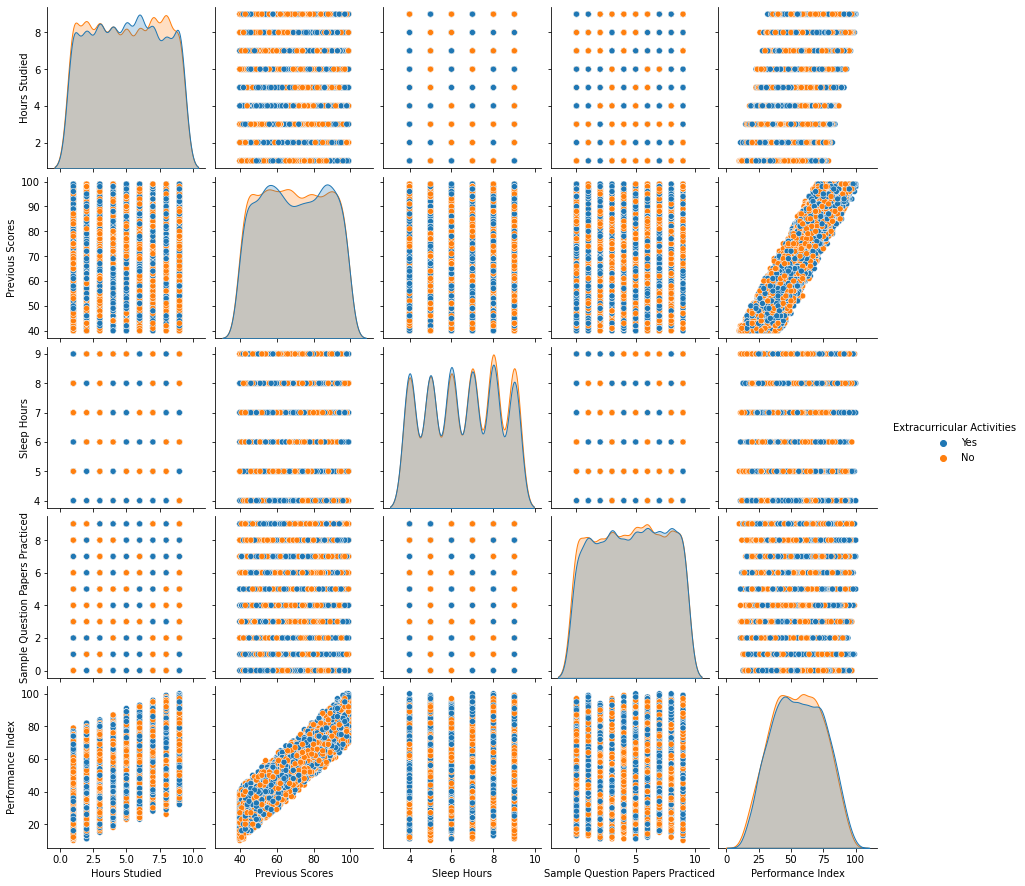

In [120]:
sns.pairplot(data_perform,hue="Extracurricular Activities")

# Visualizing the Specific Distributions from Pairplot findings

<AxesSubplot:xlabel='Previous Scores', ylabel='Performance Index'>

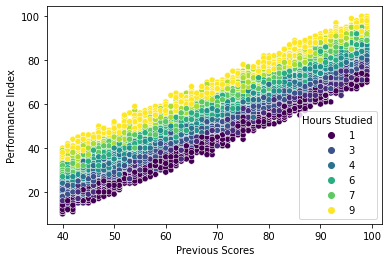

In [121]:
sns.scatterplot(data=data_perform, x = 'Previous Scores', y = 'Performance Index', hue = data_perform['Hours Studied'], palette = 'viridis', )

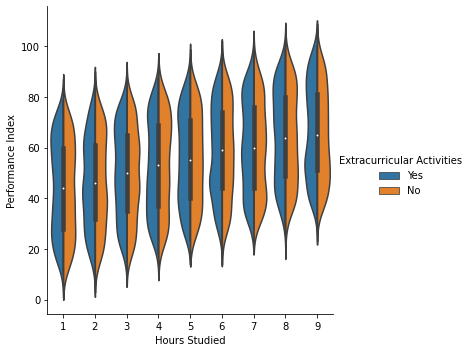

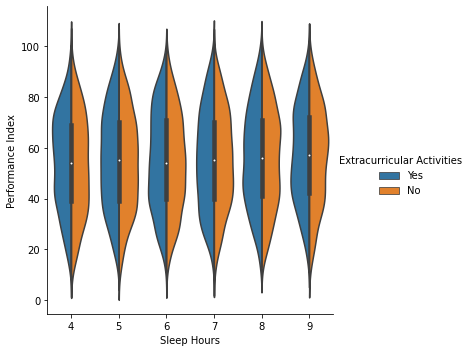

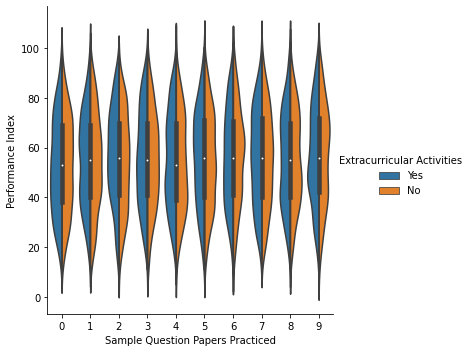

In [122]:
for i in ['Hours Studied', 'Sleep Hours','Sample Question Papers Practiced']:
    sns.catplot(data=data_perform, x=i, y='Performance Index',
                hue='Extracurricular Activities',kind="violin", split=True)

# Checking for Extracurricular Activities Correlation with Target

In [123]:
a = 'Extracurricular Activities'
b = 'Performance Index'
df_Y = data_perform[data_perform['Extracurricular Activities'] == 'Yes']
df_N = data_perform[data_perform['Extracurricular Activities'] == 'No']

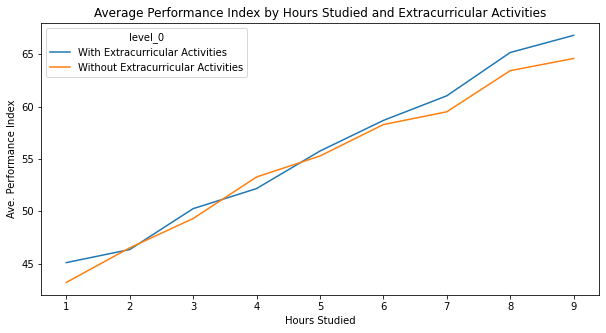

In [124]:
avg_performance_Y = df_Y.groupby('Hours Studied')['Performance Index'].mean()
avg_performance_N = df_N.groupby('Hours Studied')['Performance Index'].mean()
y = pd.concat([avg_performance_Y, avg_performance_N], axis=0,
              keys=['With Extracurricular Activities', 'Without Extracurricular Activities']).reset_index()

plt.figure(figsize = (10,5))
sns.lineplot(data = y, x = 'Hours Studied', y = 'Performance Index', hue = 'level_0')
plt.xlabel('Hours Studied')
plt.ylabel('Ave. Performance Index')
plt.title('Average Performance Index by Hours Studied and Extracurricular Activities')
plt.show()

In [125]:
df1 = pd.concat([df_Y,df_N])
df1.shape

(10000, 6)

# Visualizing for Extracurricular Activities Distribution with Features


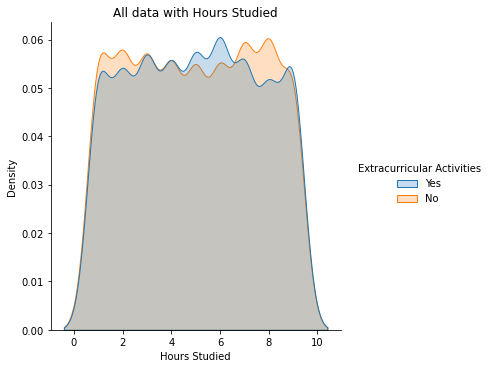

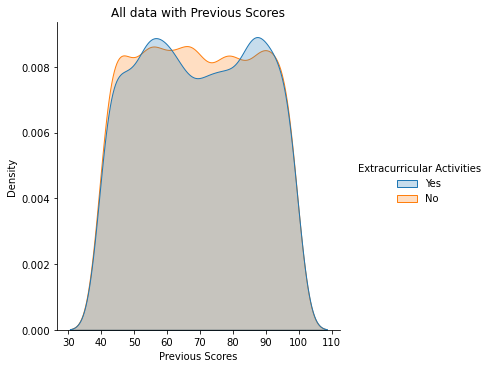

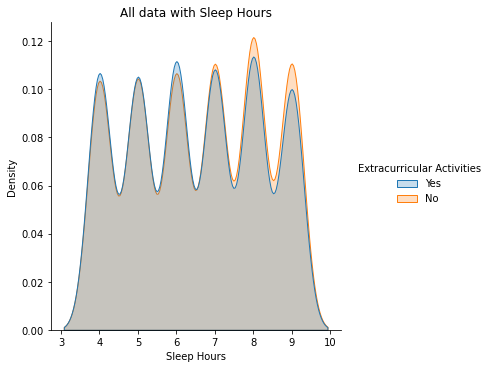

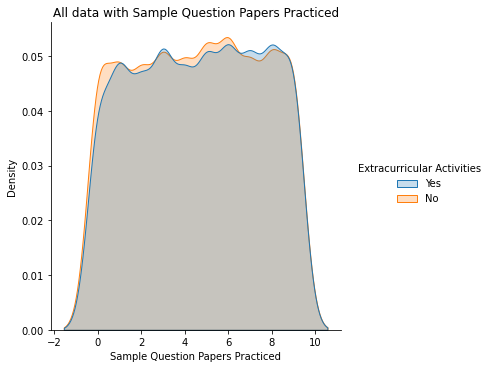

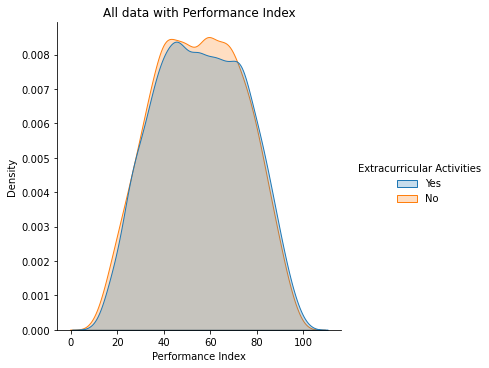

In [126]:
for i in df1.columns:
    if i != 'Extracurricular Activities':
        sns.displot(data= df1, x = i ,hue= 'Extracurricular Activities', kind='kde', fill=True)
        plt.title('All data with ' + i)
        plt.show()

# Visualizing for all correlations

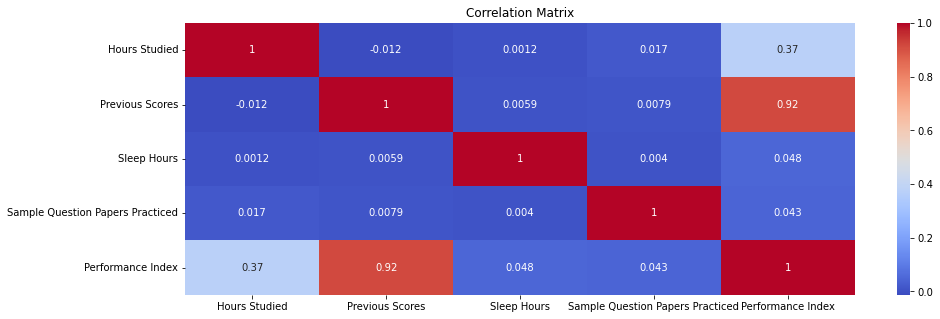

In [127]:

corr = df1.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualizing for Target correlation with Features

<AxesSubplot:>

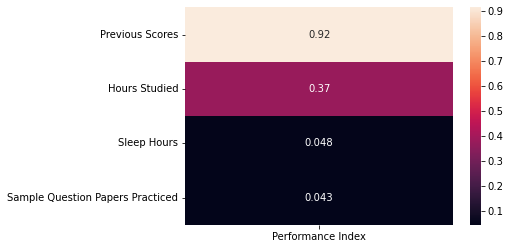

In [128]:
sns.heatmap(corr['Performance Index'].drop('Performance Index').sort_values(ascending=False).to_frame(),annot=True)

# Visualizing feature data for Top 10% ranked students

In [129]:
q = data_perform['Performance Index'].quantile(0.90)

In [130]:
df_Top = data_perform[data_perform['Performance Index']>q]
df_Top.shape

(954, 6)

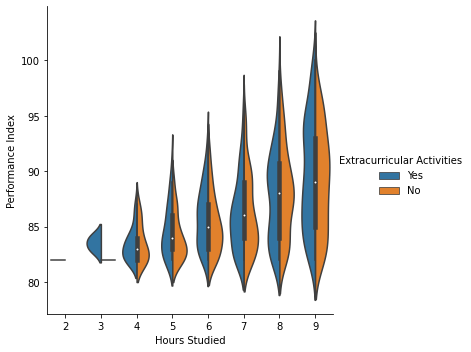

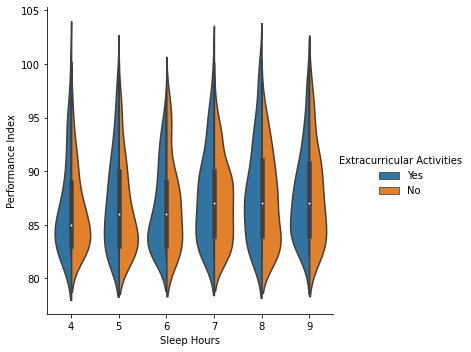

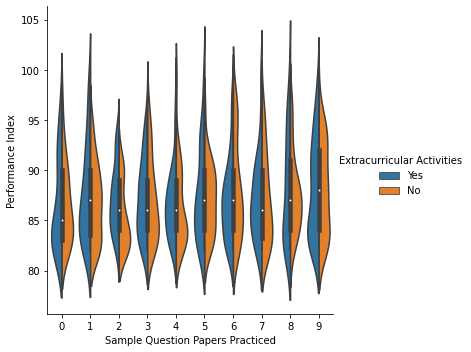

In [131]:
for i in ['Hours Studied', 'Sleep Hours','Sample Question Papers Practiced']:
    sns.catplot(data=df_Top,x=i,y="Performance Index",hue='Extracurricular Activities',kind="violin", split=True)

<AxesSubplot:xlabel='Previous Scores', ylabel='Performance Index'>

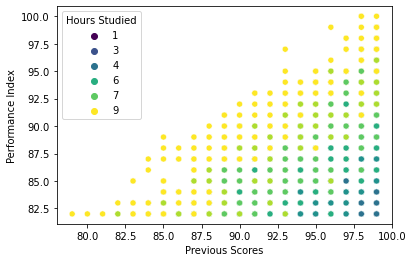

In [132]:
sns.scatterplot(data=df_Top, x = 'Previous Scores', y = 'Performance Index', hue = data_perform['Hours Studied'], palette = 'viridis', )

# Training the Data

In [133]:
x = data_perform.drop("Performance Index", axis=1)
y = data_perform["Performance Index"]

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [135]:
encoder = LabelEncoder()
x_train["Extracurricular Activities"] = encoder.fit_transform(x_train["Extracurricular Activities"])
x_test["Extracurricular Activities"] = encoder.transform(x_test["Extracurricular Activities"])

C:\Users\dell\AppData\Local\Temp/ipykernel_17752/1238762869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Extracurricular Activities"] = encoder.fit_transform(x_train["Extracurricular Activities"])
C:\Users\dell\AppData\Local\Temp/ipykernel_17752/1238762869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Extracurricular Activities"] = encoder.transform(x_test["Extracurricular Activities"])


In [136]:
model = LinearRegression()

In [137]:
model.fit(x_train,y_train)

LinearRegression()

# Evaluating Results

In [138]:
# Predicting Test Set Results
y_pred = model.predict(x_test)
y_pred = np.round(y_pred,decimals=2)

In [139]:
RP = pd.DataFrame({"Actual Performance" : y_test, "Predicted performance" : y_pred})
RP

,Actual Performance,Predicted performance
6252,51.0,54.71
4684,20.0,22.62
1731,46.0,47.90
4742,28.0,31.29
4521,41.0,43.00
...,...,...
6412,45.0,46.89
8285,66.0,62.70
7853,16.0,16.79
1095,65.0,63.34


In [140]:
r2 = r2_score(y_test,y_pred)
mean_er = mean_squared_error(y_test,y_pred)

In [141]:
print("Mean Squared Error : ",mean_er)
print("R square  : ",r2)

Mean Squared Error :  4.0826094
R square  :  0.9889833422235986


In [142]:
print("Model coefficent : ",model.coef_)
print("Model intercept : ",model.intercept_)

Model coefficent :  [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
Model intercept :  -33.9219462155563


# Getting the accuracy

In [143]:
print("The train accuracy : ", model.score(x_train,y_train))
print("The test accuracy : ", model.score(x_test,y_test))

The train accuracy :  0.9886898790682355
The test accuracy :  0.9889832909573145


Therefore, the equation of our multiple linear regression model is:

Student Performance = 2.85×Hours Studied + 1.02×Previous Scores + 0.61×Extracurricular Activities + 0.48×Sleep Hours + 0.19×Sample Question Papers Practiced - 33.92

In [148]:
data1 = pd.DataFrame({"Actual": y_test,"predicted":y_pred}).sort_index(ascending=True)
data1

,Actual,predicted
0,91.0,91.82
3,36.0,36.60
8,61.0,62.85
10,84.0,84.31
12,27.0,27.11
...,...,...
9975,63.0,60.23
9977,82.0,81.19
9989,27.0,25.34
9993,55.0,56.03


In [149]:
graph = data1.head(20)

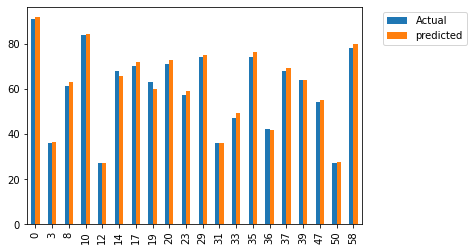

In [150]:
graph.plot(kind="bar")
plt.legend(bbox_to_anchor=(1.05,1))

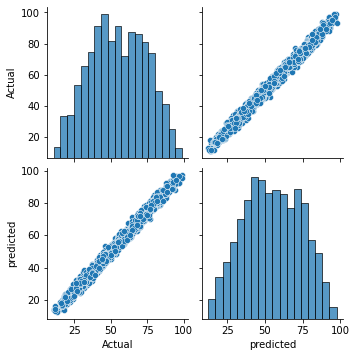

In [151]:
sns.pairplot(data1)

In [153]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
6412,2,70,0,7,3
8285,4,79,0,9,3
7853,2,40,1,7,2
1095,3,83,0,7,5


In [154]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
6412,2,70,0,7,3
8285,4,79,0,9,3
7853,2,40,1,7,2
1095,3,83,0,7,5


In [155]:
y_train

9254    36.0
1561    25.0
1670    59.0
6087    22.0
6669    40.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 8000, dtype: float64

In [156]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64